<center>
    <u><font size="36">Finding Roots</font></u>
    <h3>∙ the power & struggle of the Newton-Raphson method ∙</h3>
    <h2>Rebecca Hinrichs</h2>
    <h4>SPRING 2023</h4>
</center>

---
---

In [1]:
# Import numerical computation libraries
import math
import numpy as np
import scipy as sp
from scipy.optimize import fsolve
from scipy.optimize import root as sp_root

# Import graphic libraries
from numpy import linspace, meshgrid
import matplotlib.pyplot as plt
from matplotlib import cm

# Set back-end display options
import warnings
warnings.filterwarnings("ignore")
np.set_printoptions(precision = 4)

# Function to plot the Newtwon-Raphson solution
def plot_newton(f, g):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x = linspace(-30, 30, 20)
    y = linspace(-30, 30, 20)
    x, y = meshgrid(x, y)
    z1, z2 = f(x,y), g(x,y)
    surf1 = ax.plot_surface(x, y, z1,
                            rstride=1,cstride=1,cmap=cm.gist_earth,linewidth=0)
    surf2 = ax.plot_surface(x, y, z2,
                            rstride=1,cstride=1,cmap=cm.ocean,linewidth=0)
    plt.show();

<center><br>Questions are from <b>Problem Set 4.1</b> in <br><i>Numerical Methods in Engineering with Python 3</i> by Jaan Kiusalaas</center>

---
<center><h2>Question 23</h2></center>
<br>
Determine the coordinates of the two points where the circles $(x-2)^2 + y^2 = 4$ and $x^2 + (y-3)^2 = 4$ intersect. Start by estimating the locations of the points from a sketch of the circles, and then use the Newton-Raphson method to compute the coordinates.<br><br>


For the initial guess (x,y) = [0.25, 1]:
33 iterations found a root at [ 0.3401 -0.9466]

For the initial guess (x,y) = [1.75, 2]:
38 iterations found a root at [ 0.3367 -0.9548]

For the initial guess (x,y) = [0, 0]:
34 iterations found a root at [ 0.3394 -0.9474]

For the initial guess (x,y) = [1, 1]:
40 iterations found a root at [ 0.3359 -0.9516]

For the initial guess (x,y) = [10, 10]:
50 iterations found a root at [ 0.3375 -0.9525]

For the initial guess (x,y) = [110, 240]:
26 iterations found a root at [ 1.3283 -0.0018]

For the initial guess (x,y) = [1250, -3420]:
54 iterations found a root at [ 0.3382 -0.9548]

- ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ -

For 7 starting points, there were 7 solutions found 
	 between x = 0 :: 1250 and y = -3420 :: 240

- ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ -



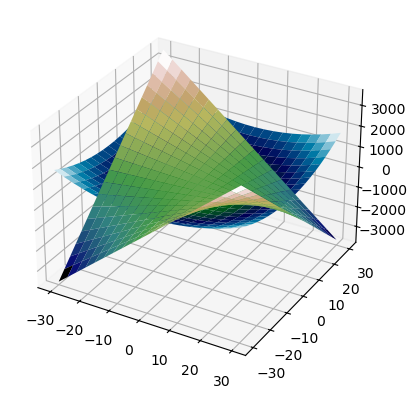

In [2]:
# System of Equations as an array for SciPy's 'fsolve'
def fg(x): return [x[0] + x[1] - 4 * x[0] * x[1],
                   x[0]**2 + x[1]**2 - 2 * x[0] + 2 * x[1] + 4
                  ]

# Equations for Plotting via Dr. Z's 'plot_newton'
def f(x,y): return x + y - 4 * x * y

def g(x,y): return x**2 + y**2 - 2 * x + 2 * y + 4

initial_guesses = ([0.25,1], [1.75,2], 
                   [0,0], [1,1], [10,10],
                   [110,240], [1250,-3420])
roots = list()
for initial_guess in initial_guesses:
    try:
        root, info, _,_ = fsolve(func = fg, x0 = initial_guess, full_output=True)
        already_found = any(np.allclose(root, roots, atol=1e-5) for r in roots)
        if not already_found: 
            roots.append(root)
            print(f"\nFor the initial guess (x,y) = {initial_guess}:\n"
                  f"{info['nfev']} iterations found a root at {root}")
    except (ValueError, RuntimeError): continue

# Present the results
print(f"\n- ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ -")
print(f"\nFor {len(initial_guesses)} starting points, there were {len(roots)} solutions found"
      f" \n\t between x = {min(min(zip(*initial_guesses)))} :: {max(min(zip(*initial_guesses)))}"
      f" and y = {min(max(zip(*initial_guesses)))} :: {max(max(zip(*initial_guesses)))}\n")
print(f"- ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ -\n")
plot_newton(f,g)

In [3]:
# Optional user interaction
print(f"Enter another starting point? P\n"
      f"See all solutions? S\n"
      f"Cancel / Continue? C\n")
choice = input("Enter P, S, or C ==> ")
if choice.upper() == 'P':
    x0 = eval(input("\nEnter initial guess for x --> "))
    x1 = eval(input("\nEnter initial guess for y --> "))
    root, info, _,_ = fsolve(func = fg, x0 = [x0,x1], full_output=True)
    print(f"\nFor the initial guess (x,y) = [{x0}, {x1}]:\n"
          f"{info['nfev']} iterations found a root at {root}")
if choice.upper() == 'S':
    print()
    [print(root) for root in roots]
print(f"\n- ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ -\n")

Enter another starting point? P
See all solutions? S
Cancel / Continue? C



Enter P, S, or C ==>  s



[ 0.3401 -0.9466]
[ 0.3367 -0.9548]
[ 0.3394 -0.9474]
[ 0.3359 -0.9516]
[ 0.3375 -0.9525]
[ 1.3283 -0.0018]
[ 0.3382 -0.9548]

- ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ -



---
<center><h2>Question 24</h2></center>

The equations

$$
\sin x + 3 \cos x - 2 = 0
$$
$$
\cos x - \sin y + 0.2 = 0
$$

have a solution in the vicinity of the point $(1,1)$. Use the Newton-Raphson method to refine the solution.
<br><br>


For the initial guess (x,y) = [-0.25, -0.25]:
36 iterations found a root at [-0.5682  1.5707]

For the initial guess (x,y) = [0, 0]:
36 iterations found a root at [-0.5682  1.5709]

For the initial guess (x,y) = [0.5, 0.5]:
12 iterations found a root at [1.2078 0.5884]

For the initial guess (x,y) = [1, 1]:
11 iterations found a root at [1.2078 0.5884]

For the initial guess (x,y) = [1.15, 1.15]:
11 iterations found a root at [1.2078 0.5884]

For the initial guess (x,y) = [-0.5, 2.5]:
33 iterations found a root at [-0.5682  1.5714]

For the initial guess (x,y) = [10, 10]:
14 iterations found a root at [20.0574  6.8716]

- ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ -

For 7 starting points, there were 7 solutions found 
	 between x = -0.5 :: 10 and y = -0.25 :: 10

- ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ -



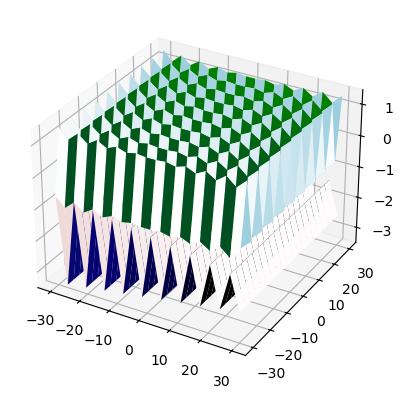

In [4]:
# System of Equations as an array for SciPy's 'fsolve'
def fg(x): return [np.sin(x[0]) + 3 * np.cos(x[0]) - 2,
                   np.cos(x[0]) - np.sin(x[1]) + 0.2
                  ]

# Equations for Plotting via Dr. Z's 'plot_newton'
def f(x,y): return np.sin(x) + 3 * np.cos(x) - 2

def g(x,y): return np.cos(x) - np.sin(y) + 0.2

initial_guesses = ([-0.25,-0.25], [0,0], 
                   [0.5,0.5], [1,1], [1.15,1.15],
                   [-0.5,2.5], [10,10])
roots = list()
for initial_guess in initial_guesses:
    try:
        root, info, _,_ = fsolve(func = fg, x0 = initial_guess, full_output=True)
        already_found = any(np.allclose(root, roots, atol=1e-5) for r in roots)
        if not already_found: 
            roots.append(root)
            print(f"\nFor the initial guess (x,y) = {initial_guess}:\n"
                  f"{info['nfev']} iterations found a root at {root}")
    except (ValueError, RuntimeError): continue

# Present the results
print(f"\n- ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ -")
print(f"\nFor {len(initial_guesses)} starting points, there were {len(roots)} solutions found"
      f" \n\t between x = {min(min(zip(*initial_guesses)))} :: {max(min(zip(*initial_guesses)))}"
      f" and y = {min(max(zip(*initial_guesses)))} :: {max(max(zip(*initial_guesses)))}\n")
print(f"- ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ -\n")
plot_newton(f,g)

In [5]:
# Optional user interaction
print(f"Enter another starting point? P\n"
      f"See all solutions? S\n"
      f"Cancel / Continue? C\n")
choice = input("Enter P, S, or C ==> ")
if choice.upper() == 'P':
    x0 = eval(input("\nEnter initial guess for x --> "))
    x1 = eval(input("\nEnter initial guess for y --> "))
    root, info, _,_ = fsolve(func = fg, x0 = [x0,x1], full_output=True)
    print(f"\nFor the initial guess (x,y) = [{x0}, {x1}]:\n"
          f"{info['nfev']} iterations found a root at {root}")
if choice.upper() == 'S':
    print()
    [print(root) for root in roots]
print(f"\n- ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ -\n")

Enter another starting point? P
See all solutions? S
Cancel / Continue? C



Enter P, S, or C ==>  s



[-0.5682  1.5707]
[-0.5682  1.5709]
[1.2078 0.5884]
[1.2078 0.5884]
[1.2078 0.5884]
[-0.5682  1.5714]
[20.0574  6.8716]

- ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ -



---
<center><h2>Question 25</h2></center>

Use any method to find <i>all</i> real solutions of the simultaneous equations

$$
\tan x - y = 1
$$
$$
\cos x - 3 \sin y = 0
$$

in the region $0 \leq x \leq 1.5$.
<br><br>


Enter the number of initial guesses ==>  10



For the initial guess (x,y) = (0.0, -30.0):
18 iterations found a root at [ 3.7702 -0.273 ]

For the initial guess (x,y) = (0.16666666666666666, -23.333333333333332):
25 iterations found a root at [ 8.3193 -2.9914]

For the initial guess (x,y) = (0.3333333333333333, -16.666666666666664):
30 iterations found a root at [-4.5937 -9.3853]

For the initial guess (x,y) = (0.5, -10.0):
21 iterations found a root at [-1.4532 -9.4639]

For the initial guess (x,y) = (0.6666666666666666, -3.333333333333332):
28 iterations found a root at [-1.1568 -3.2761]

For the initial guess (x,y) = (0.8333333333333333, 3.3333333333333357):
23 iterations found a root at [1.3294 3.0618]

For the initial guess (x,y) = (1.0, 10.0):
16 iterations found a root at [-1.7081  6.2375]

For the initial guess (x,y) = (1.1666666666666665, 16.66666666666667):
20 iterations found a root at [0.8816 0.2136]

For the initial guess (x,y) = (1.3333333333333333, 23.333333333333336):
19 iterations found a root at [0.8816 0.2136]


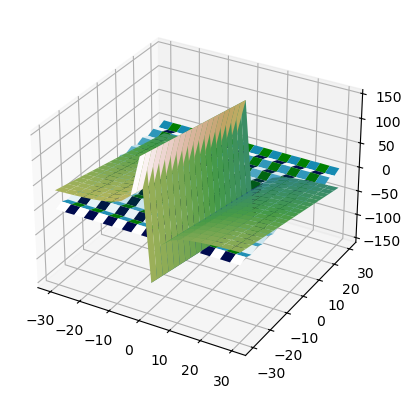

In [6]:
# System of Equations as an array for SciPy's 'fsolve'
def fg(x): return [np.tan(x[0]) - x[1] - 1,
                   np.cos(x[0]) - 3 * np.sin(x[1])
                  ]

# Equations for Plotting via Dr. Z's 'plot_newton'
def f(x,y): return np.tan(x) - y - 1

def g(x,y): return np.cos(x) - 3 * np.sin(y)

n = int(input("\nEnter the number of initial guesses ==> "))
x_range = np.linspace(0, 1.5, n)
y_range = np.linspace(-30, 30, n)
initial_guesses = list(zip(x_range, y_range))

roots = list()
for initial_guess in initial_guesses:
    try:
        root, info, _,_ = fsolve(func = fg, x0 = initial_guess, full_output=True)
        already_found = any(np.allclose(root, roots, atol=1e-5) for r in roots)
        if not already_found: 
            roots.append(root)
            print(f"\nFor the initial guess (x,y) = {initial_guess}:\n"
                  f"{info['nfev']} iterations found a root at {root}")
    except (ValueError, RuntimeError): continue

# Present the results
print(f"\n- ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ -")
print(f"\nFor {n} starting points, there were {len(roots)} solutions found"
      f" \n\t between x = {min([guess[0] for guess in initial_guesses])} :: {max([guess[0] for guess in initial_guesses])}"
      f" and y = {min([guess[1] for guess in initial_guesses])} :: {max([guess[1] for guess in initial_guesses])}\n")
print(f"- ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ -\n")
plot_newton(f,g)

In [7]:
# Optional user interaction
print(f"Enter another starting point? P\n"
      f"See all solutions? S\n"
      f"Cancel / Continue? C\n")
choice = input("Enter P, S, or C ==> ")
if choice.upper() == 'P':
    x0 = eval(input("\nEnter initial guess for x --> "))
    x1 = eval(input("\nEnter initial guess for y --> "))
    root, info, _,_ = fsolve(func = fg, x0 = [x0,x1], full_output=True)
    print(f"\nFor the initial guess (x,y) = [{x0}, {x1}]:\n"
          f"{info['nfev']} iterations found a root at {root}")
if choice.upper() == 'S':
    print()
    [print(root) for root in roots]
print(f"\n- ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ -\n")

Enter another starting point? P
See all solutions? S
Cancel / Continue? C



Enter P, S, or C ==>  s



[ 3.7702 -0.273 ]
[ 8.3193 -2.9914]
[-4.5937 -9.3853]
[-1.4532 -9.4639]
[-1.1568 -3.2761]
[1.3294 3.0618]
[-1.7081  6.2375]
[0.8816 0.2136]
[0.8816 0.2136]
[1.4749 9.3928]

- ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ - ~ -



---
<center><h2>Question 26</h2></center>

The equation of a circle is
$$
(x-a)^2 + (y-b)^2 = R^2
$$
where $R$ is the radius and $(a,b)$ are the coordinates of the center. If the coordinates of three points on the circle are

|  |  |  |  |  |
| --- | --- | --- | --- | --- |
| $x$ || 8.21 | 0.34 | 5.96 | 
| $y$ || 0.00 | 6.62 | -1.12 | 

determine $R$, $a$, and $b$.<br><br>

In [8]:
## FUNCTION FOR PLOTTING CIRCLES
def make_circle_plot2(x_data, y_data, ctr=(0,0), radius=1):
    circle = plt.Circle(ctr, radius, color='black', fill=False, label='Circle A')
    fig, ax = plt.subplots()
    ax.set_aspect(1)
    ax.add_patch(circle)
    ax.scatter(x_data[0], y_data[0], color='red', label='Point 1')
    ax.scatter(x_data[1], y_data[1], color='blue', label='Point 2')
    ax.scatter(x_data[2], y_data[2], color='green', label='Point 3')
    plt.xlim(-2, 12)
    plt.ylim(-2, 12)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("Equation of a Circle with a,b,R")
    plt.legend()
    plt.grid()
    plt.show();


The solutions are

		a = 4.830105654297453
		b = 3.9699216766345855
		R = 5.213824307236019




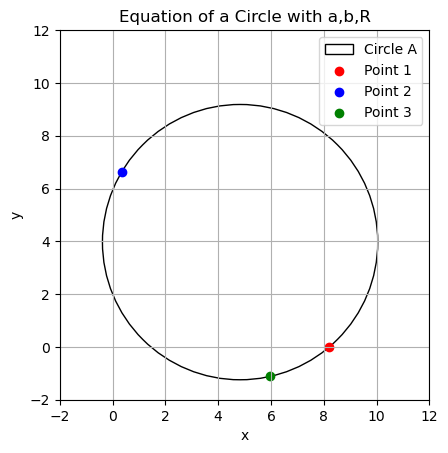

In [9]:
def equations(y): # system of equations using given points x = [x,y] and guesstimates y = [a,b,R]
    eq = np.zeros(3)
    for i in range(3):
        eq[i] = (x[i,0] - y[0])**2 + (x[i,1] - y[1])**2 - y[2]**2  # where x = [x,y] and y = [a,b,R]
    return eq
x = np.array([[8.21, 0.00],  # we were given 3 (x,y) pairs
              [0.34, 6.62],
              [5.96, -1.12]])
initial_guess = np.array([(x[0,0]+x[1,0])/2, (x[0,1]+x[1,1])/2, 1])
roots = sp_root(x0=initial_guess, fun=equations)
a, b, R = roots.x
print(f'\nThe solutions are\n\n\t\ta = {a}\n\t\tb = {b}\n\t\tR = {R}\n\n')
make_circle_plot2(x[:,0], x[:,1], 
                  ctr=(a,b), 
                  radius=R)


---
---

<center><h3>Thank you!</h3></center>